In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection, cross_validation, linear_model, preprocessing, ensemble, metrics, svm
import seaborn as sns
%pylab inline

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Populating the interactive namespace from numpy and matplotlib


C:\Users\ADMIN\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
data = pd.read_csv('orange_small_churn_data.txt', sep=',')
labels = pd.read_csv('orange_small_churn_labels.txt', header=None)

In [3]:
labels[0].value_counts()/labels[0].value_counts().sum()

-1    0.9256
 1    0.0744
Name: 0, dtype: float64

In [4]:
nulls =data.notna().sum()
tr= (labels==-1).values.T[0]
fr = (labels==1).values.T[0]
mas=[(np.abs(np.mean(data[x][tr])-np.mean(data[x][fr])),x) for x,y in zip(data.columns,data.dtypes) if y==float64 and data[x][fr].notna().sum()>200]

In [5]:
#importance of variables
sorted(mas,key=lambda x:-x[0])[:10]

[(162842.18453814648, 'Var113'),
 (151453.3519627573, 'Var153'),
 (77671.00355923455, 'Var38'),
 (56780.681290878216, 'Var76'),
 (29536.67380707286, 'Var149'),
 (14942.720026813331, 'Var134'),
 (14379.56216465951, 'Var81'),
 (12389.653531283606, 'Var133'),
 (10475.285967579344, 'Var163'),
 (9689.091444824822, 'Var94')]

In [6]:
data['labels']=labels

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ADMIN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


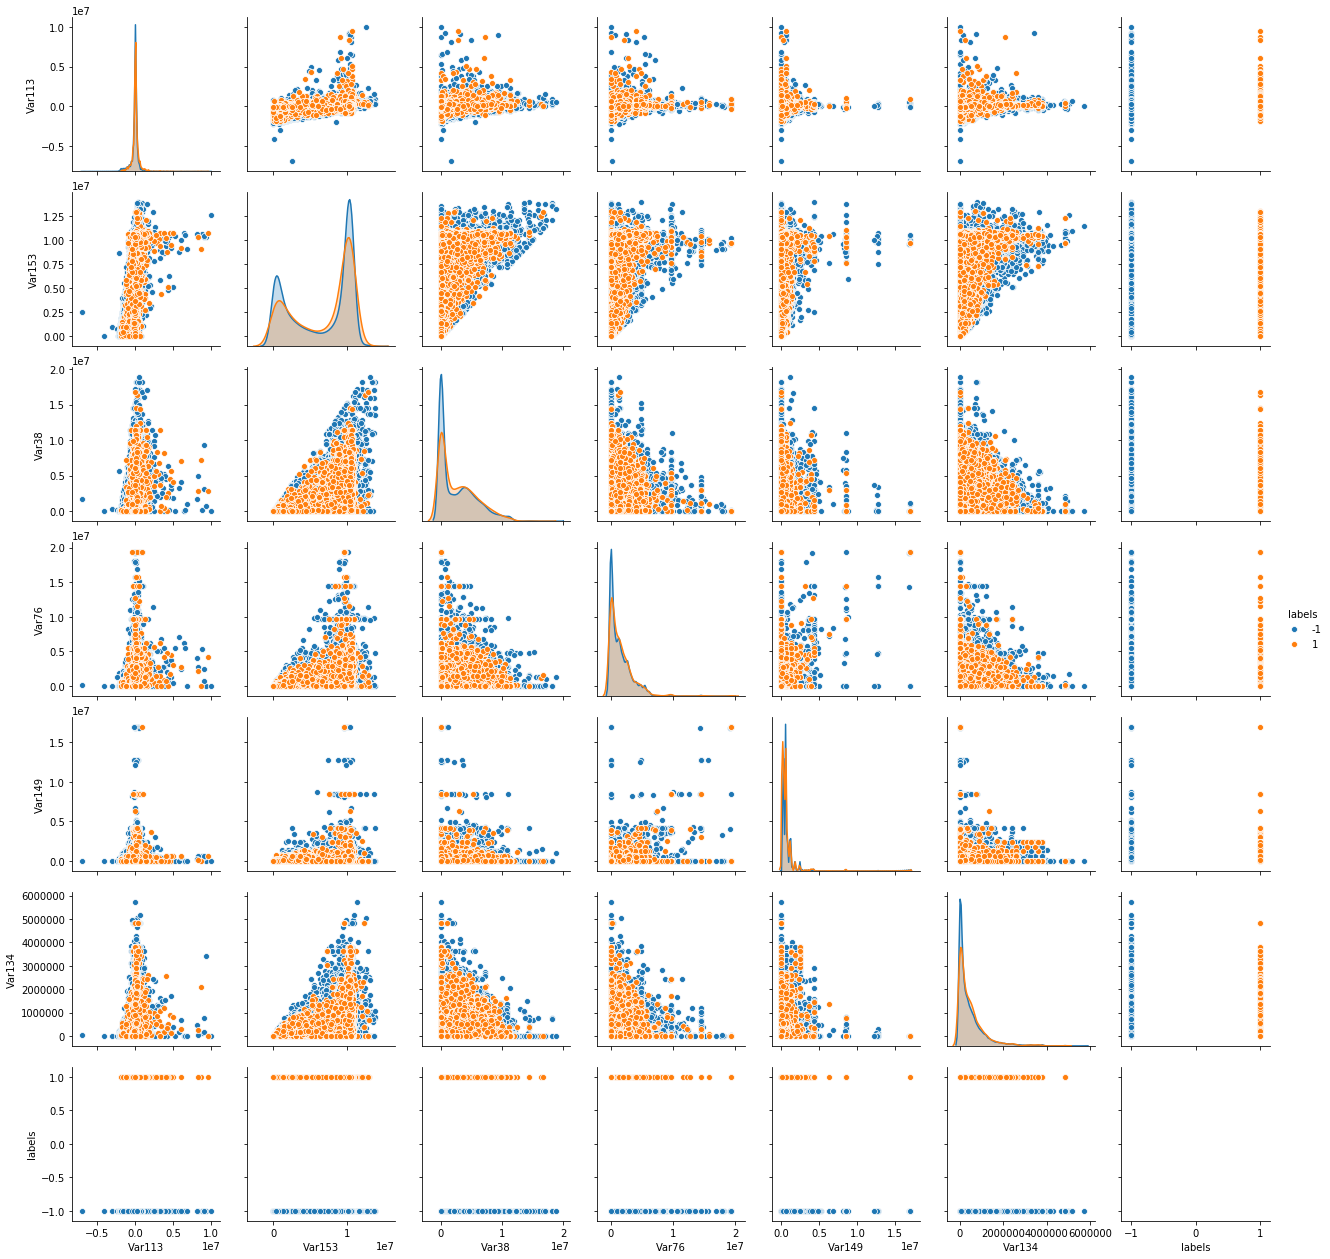

In [7]:
cols =[ 'Var113', 'Var153', 'Var38', 'Var76', 'Var149', 'Var134']
sns.pairplot(data[cols+['labels']].dropna(),hue='labels')

In [8]:
train,test=train_test_split(data,test_size= 0.25)

In [9]:
def undersampling(train):
    X_1=train[train.labels==1]
    X_0=train[train.labels==-1]
    res = pd.concat([X_1,X_0.reset_index().loc[np.random.randint(0,len(X_0),len(X_1))]])
    return res


In [130]:
y,f=KFold(estimator=LogisticRegression(),x_data=x_data,y_data=y_data)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

mean f1 score: 0.9158971316956142


In [140]:
for k,l in zip(f,y):
    print(metrics.roc_auc_score(f[k].apply(lambda x:x[0]),y[l]))

0.899007869516661
0.9025920058177285
0.8801801801801804
0.9630630630630631


In [114]:
ar=[]
for x,y in ff:
    ar.append([len(x),len(y)])

In [115]:
ar

[[3332, 1112], [3332, 1112], [3334, 1110], [3334, 1110]]

In [57]:
df = undersampling(train)
le = preprocessing.LabelEncoder()
for m in range(190,230):
        le.fit(df['Var'+str(m)].astype(str))
        df.loc[df['Var'+str(m)].index,'Var'+str(m)]=pd.DataFrame({'Var'+str(m):le.transform(df['Var'+str(m)].astype(str)) },dtype=np.float)
df.fillna(0,inplace=True)


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [145]:
# кросс-валидация ведется с помощью StratifiedKFold, количество фолдов - 5. + f1 score
def KFold(estimator, x_data, y_data):
    skf = cross_validation.StratifiedKFold(y_data.iloc[:,0], n_folds=4,random_state=3)

    y_scores = pd.DataFrame()
    y_tests = pd.DataFrame()
    y_pred = pd.DataFrame() 
    f1 = np.array([])
    n = 0
    
    for train_index, test_index in skf:
            train_index=train_index[:3332]
            test_index=test_index[:1110]
            estimator.fit(x_data.iloc[train_index].values, y_data.iloc[train_index].values)
            y_scores['fold_'+str(n)] = estimator.predict(x_data.iloc[test_index].values)
            y_pred['fold_'+str(n)] = estimator.predict(x_data.iloc[test_index].values)
            y_tests['fold_'+str(n)] = y_data.iloc[test_index].values.tolist()
            f1 = np.append(f1, metrics.f1_score(y_data.iloc[test_index, :].values, y_pred.iloc[:,n].values))
            
            n+=1
    print('mean f1 score: '+str(np.mean(f1)))
    return y_scores, y_tests

def PRC(y_scores, y_tests):
    plt.figure(figsize = (7,7))
    mean_PR = np.array([])
    n = 0
    for i, j in zip(y_scores, y_tests):
        precision, recall, _ = metrics.precision_recall_curve(y_tests[i].apply(lambda x:x[0]), y_scores[j])
        average_precision = metrics.average_precision_score(y_tests[i].apply(lambda x:x[0]), y_scores[j])
        mean_PR = np.append(mean_PR, average_precision)
        plt.plot(recall, precision, color='b', alpha=0.5, label='PR fold '+str(n) + ' (score = %0.2f)' % average_precision)
        plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
        n+=1
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc="upper right")
    plt.title('2-class Precision-Recall curve: Mean PR={0:0.3f}'.format(mean_PR.mean()))
    plt.show()
    
# построение AUC_ROC  
def ROC(y_scores, y_test):
    plt.figure(figsize = (7,7))
    Mean_ROC = np.array([])
    n = 0
    for i, j in zip(y_scores, y_tests):
        fpr, tpr, thresholds = metrics.roc_curve(y_tests[i].apply(lambda x:x[0]), y_scores[j])
        roc_auc = metrics.auc(fpr, tpr)
        lw = 2
        Mean_ROC = np.append(Mean_ROC, roc_auc)
        plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC fold '+str(n)+' (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        n += 1
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    print(Mean_ROC)
    plt.title('2-class ROC curve: Mean ROC area=' + str(np.mean(Mean_ROC)))
    plt.show()

In [166]:
x_data=df[df.columns[:-2]]
y_data=df[df.columns[df.columns=='labels']]

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

mean f1 score: 0.6740100806527237
[0.67378191 0.64950134 0.65405405 0.67387387]


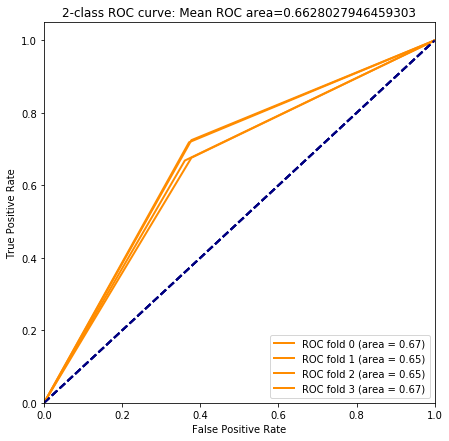

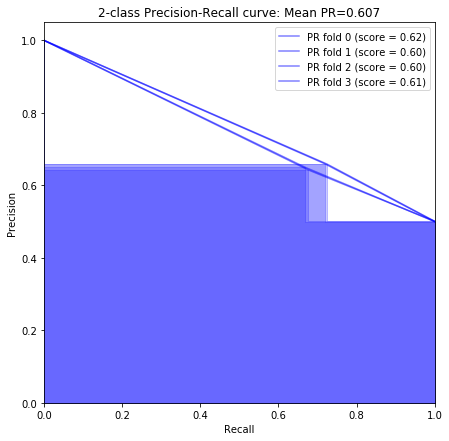

In [167]:
gradBoost = ensemble.GradientBoostingClassifier()
y_scores, y_tests = KFold(gradBoost, x_data,y_data)
ROC(y_scores, y_tests)
PRC(y_scores, y_tests)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:810: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.870687e-18
  overwrite_a=True).T
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:810: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.879

mean f1 score: 0.6313689365308929
[0.60526128 0.59806054 0.58288288 0.63153153]


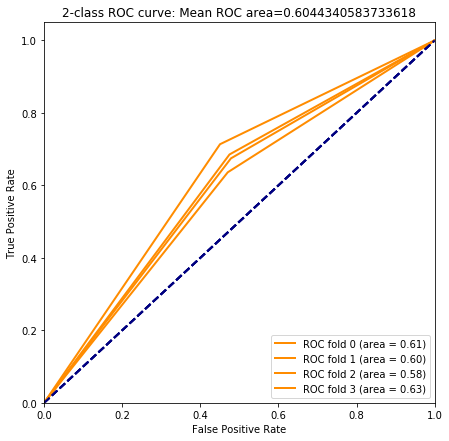

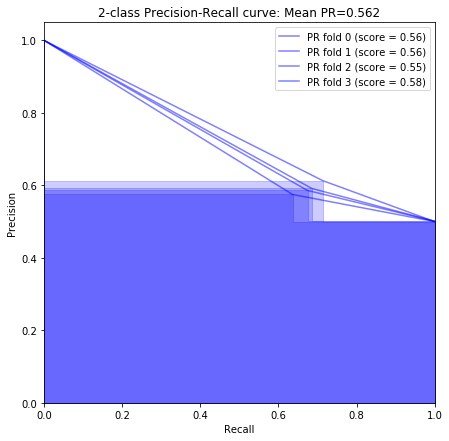

In [168]:
from sklearn.linear_model import RidgeClassifier,LogisticRegression
# Ridge:
ridge = linear_model.RidgeClassifier()
y_scores, y_tests = KFold(ridge,x_data=x_data,y_data=y_data)
ROC(y_scores, y_tests)
PRC(y_scores, y_tests)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

mean f1 score: 0.5861202923869424
[0.59722294 0.55401527 0.54864865 0.59189189]


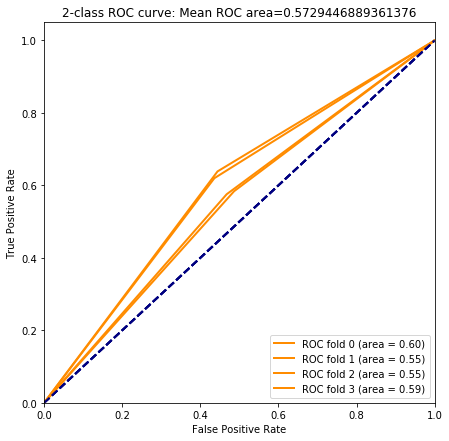

In [171]:
# logreg:
logreg = linear_model.LogisticRegression()
y_scores, y_tests = KFold(logreg,x_data=x_data,y_data=y_data)
ROC(y_scores, y_tests)
#PRC(y_scores, y_tests)

In [170]:
important_featur=np.array(sorted(zip(gradBoost.feature_importances_,x_data.columns))[::-1])
important_featur[:10]

array([['0.12446283313606228', 'Var126'],
       ['0.07122746525154626', 'Var113'],
       ['0.051553811122562125', 'Var189'],
       ['0.05141899498692834', 'Var73'],
       ['0.04218555923567892', 'Var153'],
       ['0.04113909006037017', 'Var28'],
       ['0.03807315909466615', 'Var13'],
       ['0.034603955268054064', 'Var94'],
       ['0.03126664733977181', 'Var57'],
       ['0.027260107686555245', 'Var81']], dtype='<U32')

In [173]:
important_featur[:,1]

array(['Var126', 'Var113', 'Var189', 'Var73', 'Var153', 'Var28', 'Var13',
       'Var94', 'Var57', 'Var81', 'Var204', 'Var74', 'Var140', 'Var133',
       'Var149', 'Var51', 'Var160', 'Var16', 'Var6', 'Var134', 'Var65',
       'Var217', 'Var38', 'Var117', 'Var125', 'Var99', 'Var40', 'Var83',
       'Var35', 'Var166', 'Var222', 'Var178', 'Var197', 'Var70', 'Var119',
       'Var76', 'Var22', 'Var18', 'Var85', 'Var214', 'Var25', 'Var123',
       'Var144', 'Var59', 'Var24', 'Var102', 'Var188', 'Var154', 'Var72',
       'Var168', 'Var112', 'Var21', 'Var43', 'Var221', 'Var223', 'Var53',
       'Var198', 'Var226', 'Var109', 'Var1', 'Var220', 'Var132', 'Var30',
       'Var84', 'Var177', 'Var212', 'Var192', 'Var80', 'Var159', 'Var33',
       'Var218', 'Var187', 'Var151', 'Var41', 'Var228', 'Var205',
       'Var115', 'Var107', 'Var180', 'Var58', 'Var105', 'Var7', 'Var163',
       'Var96', 'Var95', 'Var194', 'Var165', 'Var199', 'Var56', 'Var179',
       'Var124', 'Var202', 'Var201', 'Var114', 'Var

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

mean f1 score: 0.6732833212133165
[0.67288263 0.64950134 0.65315315 0.67297297]


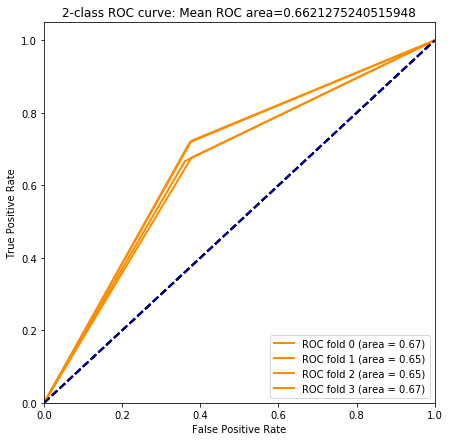

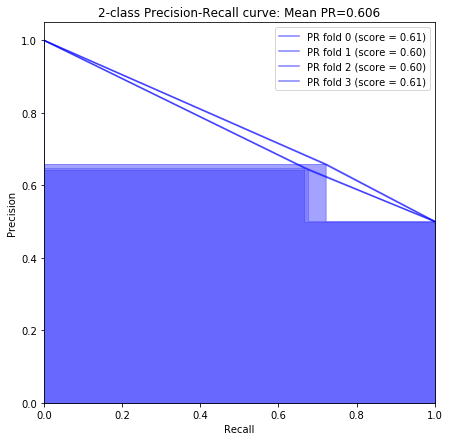

In [174]:
gradBoost1 = ensemble.GradientBoostingClassifier()
y_scores, y_tests = KFold(gradBoost1, x_data[important_featur[:,1]],y_data)
ROC(y_scores, y_tests)
PRC(y_scores, y_tests)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

mean f1 score: 0.6676270687519752
[0.67469093 0.64590746 0.64864865 0.66216216]


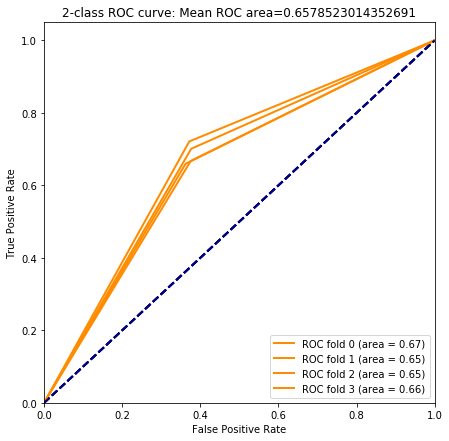

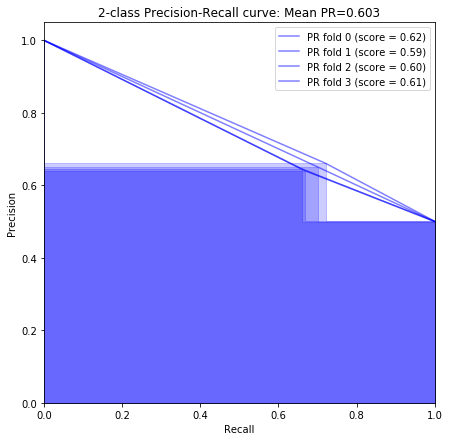

In [175]:
gradBoost2 = ensemble.GradientBoostingClassifier()
y_scores, y_tests = KFold(gradBoost2, x_data[important_featur[:,1][:20]],y_data)
ROC(y_scores, y_tests)
PRC(y_scores, y_tests)